<a href="https://colab.research.google.com/github/hsiaom26/DS4CS/blob/master/T10_StaticAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Static Analysis

## Handcrafted

only for binary analysis, not symbolic analysis.

In [ ]:
# Get a 32-bit pe file
!wget https://the.earth.li/~sgtatham/putty/latest/w32/putty.exe -O putty32.exe

--2021-03-31 16:07:40--  https://the.earth.li/~sgtatham/putty/latest/w32/putty.exe
Resolving the.earth.li (the.earth.li)... 93.93.131.124, 2a00:1098:86:4d:c0ff:ee:15:900d
Connecting to the.earth.li (the.earth.li)|93.93.131.124|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://the.earth.li/~sgtatham/putty/0.74/w32/putty.exe [following]
--2021-03-31 16:07:41--  https://the.earth.li/~sgtatham/putty/0.74/w32/putty.exe
Reusing existing connection to the.earth.li:443.
HTTP request sent, awaiting response... 200 OK
Length: 1096080 (1.0M) [application/x-msdos-program]
Saving to: ‘putty32.exe’

putty32.exe         100%[===================>]   1.04M  1.27MB/s    in 0.8s    

2021-03-31 16:07:42 (1.27 MB/s) - ‘putty32.exe’ saved [1096080/1096080]



In [ ]:
# Get a 64-bit pe file
!wget https://the.earth.li/~sgtatham/putty/latest/w64/putty.exe -O putty64.exe

--2021-03-31 16:07:42--  https://the.earth.li/~sgtatham/putty/latest/w64/putty.exe
Resolving the.earth.li (the.earth.li)... 93.93.131.124, 2a00:1098:86:4d:c0ff:ee:15:900d
Connecting to the.earth.li (the.earth.li)|93.93.131.124|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://the.earth.li/~sgtatham/putty/0.74/w64/putty.exe [following]
--2021-03-31 16:07:43--  https://the.earth.li/~sgtatham/putty/0.74/w64/putty.exe
Reusing existing connection to the.earth.li:443.
HTTP request sent, awaiting response... 200 OK
Length: 1179024 (1.1M) [application/x-msdos-program]
Saving to: ‘putty64.exe’

putty64.exe         100%[===================>]   1.12M  1.37MB/s    in 0.8s    

2021-03-31 16:07:44 (1.37 MB/s) - ‘putty64.exe’ saved [1179024/1179024]



In [ ]:
!ls -al

total 2240
drwxr-xr-x 1 root root    4096 Mar 31 16:07 .
drwxr-xr-x 1 root root    4096 Mar 31 16:07 ..
drwxr-xr-x 4 root root    4096 Mar 25 13:38 .config
-rw-r--r-- 1 root root 1096080 Jun 21  2020 putty32.exe
-rw-r--r-- 1 root root 1179024 Jun 21  2020 putty64.exe
drwxr-xr-x 1 root root    4096 Mar 25 13:38 sample_data


### EXE file?


In [ ]:
def isExe(fp):
    if fp.endswith("exe"):
        return True
    else:
        return False

In [ ]:
isExe("/content/putty32.exe")

True

### MZ (DOS) file?

In [ ]:
def isMZ(fp):
    with open(fp, 'rb') as hnd:
        if hnd.read(2) == b"MZ":
            return True
        else:
            return False

In [ ]:
isMZ("/content/putty32.exe")

True

### PE file?

In [ ]:
def isPE(fp):
  try:
    with open(fp, 'rb') as hnd:
      if hnd.read(2) != b"MZ":
        return False
      hnd.seek(0x3c, 0)
      
      import struct
      offset = struct.unpack('<i', hnd.read(4))[0]
      hnd.seek(offset, 0)
      if hnd.read(4) == b"PE\0\0":
        return True
      else:
        print("isMZ, not PE.")
        return False
  except:
    return False

In [ ]:
isPE("/content/putty32.exe")

True

### Architecture? (Machine)

In [ ]:
def machine(fp):
  try:
    with open(fp, 'rb') as hnd:
      hnd.seek(0x3c, 0)
      
      import struct
      offset = struct.unpack('<i', hnd.read(4))[0]
      hnd.seek(offset, 0)
      hnd.read(4)
      machine = struct.unpack("<H", hnd.read(2))[0]

      if machine == 332: # IMAGE_FILE_MACHINE_I386
        return "IA-32 (32-bit x86)"
      elif machine == 512: #IMAGE_FILE_MACHINE_IA64:
        return "IA-64 (Itanium)"
      elif machine == 34404: #IMAGE_FILE_MACHINE_AMD64:
        return "AMD64 (64-bit x86)"
      else:
        return "Unknown architecture"
  except:
    return "Exception"

In [ ]:
machine("/content/putty32.exe")

'IA-32 (32-bit x86)'

In [ ]:
machine("/content/putty64.exe")

'AMD64 (64-bit x86)'

### Hex representation

In [ ]:
import binascii

def printHex(fp, limit = 64):
  with open(fp, 'rb') as f:
    content = f.read()
    
    i = 0
    for b in content:
      print(format(b, "02x"), " ", end="")
      if i% 8 == 7:
        print("")
      i += 1
      if i == limit:
        break

In [ ]:
printHex("/content/putty32.exe", limit = 160)

4d  5a  78  00  01  00  00  00  
04  00  00  00  00  00  00  00  
00  00  00  00  00  00  00  00  
40  00  00  00  00  00  00  00  
00  00  00  00  00  00  00  00  
00  00  00  00  00  00  00  00  
00  00  00  00  00  00  00  00  
00  00  00  00  78  00  00  00  
0e  1f  ba  0e  00  b4  09  cd  
21  b8  01  4c  cd  21  54  68  
69  73  20  70  72  6f  67  72  
61  6d  20  63  61  6e  6e  6f  
74  20  62  65  20  72  75  6e  
20  69  6e  20  44  4f  53  20  
6d  6f  64  65  2e  24  00  00  
50  45  00  00  4c  01  07  00  
f6  9c  ef  5e  00  00  00  00  
00  00  00  00  e0  00  02  01  
0b  01  0e  00  00  ce  08  00  
00  aa  07  00  00  00  00  00  


### Hash

In [ ]:
import hashlib

#### MD5 and SHA265

You can check it against with the announced hash values in https://www.chiark.greenend.org.uk/~sgtatham/putty/latest.html

In [ ]:
filenamepath = "/content/putty32.exe"
md5_value = hashlib.md5(open(filenamepath, 'rb').read()).hexdigest()
print(md5_value)

374fb48a959a96ce92ae0e4346763293


In [ ]:
sha256_value = hashlib.sha256(open(filenamepath, 'rb').read()).hexdigest()
print(sha256_value)

f2d2638afb528c7476c9ee8e83ddb20e686b0b05f53f2f966fd9eb962427f8aa


#### GPG

Check the calculated (GNU Privacy Guard) GPG value against with the value in [PuTTY web page](https://www.chiark.greenend.org.uk/~sgtatham/putty/latest.html). Google "digital signature" first.

* Signature ([here](https://www.chiark.greenend.org.uk/~sgtatham/putty/latest.html))
* Public Key ([here](https://www.chiark.greenend.org.uk/~sgtatham/putty/keys.html))



In [ ]:
!wget https://the.earth.li/~sgtatham/putty/latest/w32/putty.exe.gpg

--2021-03-31 16:07:44--  https://the.earth.li/~sgtatham/putty/latest/w32/putty.exe.gpg
Resolving the.earth.li (the.earth.li)... 93.93.131.124, 2a00:1098:86:4d:c0ff:ee:15:900d
Connecting to the.earth.li (the.earth.li)|93.93.131.124|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://the.earth.li/~sgtatham/putty/0.74/w32/putty.exe.gpg [following]
--2021-03-31 16:07:45--  https://the.earth.li/~sgtatham/putty/0.74/w32/putty.exe.gpg
Reusing existing connection to the.earth.li:443.
HTTP request sent, awaiting response... 200 OK
Length: 438 [application/pgp-signature]
Saving to: ‘putty.exe.gpg’

putty.exe.gpg       100%[===================>]     438  --.-KB/s    in 0s      

2021-03-31 16:07:45 (60.8 MB/s) - ‘putty.exe.gpg’ saved [438/438]



In [ ]:
!wget https://www.chiark.greenend.org.uk/~sgtatham/putty/keys/release-2018.asc

--2021-03-31 16:07:45--  https://www.chiark.greenend.org.uk/~sgtatham/putty/keys/release-2018.asc
Resolving www.chiark.greenend.org.uk (www.chiark.greenend.org.uk)... 212.13.197.231, 2001:ba8:1e3::
Connecting to www.chiark.greenend.org.uk (www.chiark.greenend.org.uk)|212.13.197.231|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2090 (2.0K) [text/plain]
Saving to: ‘release-2018.asc’

release-2018.asc    100%[===================>]   2.04K  --.-KB/s    in 0s      

2021-03-31 16:07:46 (102 MB/s) - ‘release-2018.asc’ saved [2090/2090]



In [ ]:
!gpg --import release-2018.asc

gpg: directory '/root/.gnupg' created
gpg: keybox '/root/.gnupg/pubring.kbx' created
gpg: key 6289A25F4AE8DA82: 1 signature not checked due to a missing key
gpg: /root/.gnupg/trustdb.gpg: trustdb created
gpg: key 6289A25F4AE8DA82: public key "PuTTY Releases <putty@projects.tartarus.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
gpg: no ultimately trusted keys found


In [ ]:
!gpg --verify putty.exe.gpg putty32.exe

gpg: Signature made Sat 27 Jun 2020 07:00:58 AM UTC
gpg:                using RSA key E27394ACA3F9D9049522E0546289A25F4AE8DA82
gpg: Good signature from "PuTTY Releases <putty@projects.tartarus.org>" [unknown]
gpg: WARNING: This key is not certified with a trusted signature!
gpg:          There is no indication that the signature belongs to the owner.
Primary key fingerprint: E273 94AC A3F9 D904 9522  E054 6289 A25F 4AE8 DA82


# Virustotal

https://www.virustotal.com/gui/home/upload

# pefile


In [ ]:
!pip install pefile

     |████████████████████████████████| 71kB 5.2MB/s 
  Created wheel for pefile: filename=pefile-2019.4.18-cp37-none-any.whl size=60821 sha256=0607ea95e8e844b3cad9a192f6295b519b29d942cbfcb151a1d28c8495ac4212
  Stored in directory: /root/.cache/pip/wheels/1c/a1/95/4f33011a0c013c872fe6f0f364dc463a2588120820e40a30d8
Successfully built pefile


In [ ]:
import pefile

### File Type

In [ ]:
filenamepath = "/content/putty32.exe"

pef = pefile.PE(filenamepath, fast_load = False)

In [ ]:
print(pef.is_dll())
print(pef.is_driver())
print(pef.is_exe())

False
False
True


### Machine, Timestamp, imphash

In [ ]:
print(pef.FILE_HEADER.Machine)

332


In [ ]:
import time
timestamp = pef.FILE_HEADER.TimeDateStamp
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(timestamp)))

2020-06-21 17:46:30


In [ ]:
print(pef.get_imphash())

d803cf4cabab38ad6ac8123e3c7a53dd


### Section and Entropy

In [ ]:
def printSecEntropy(filenamepath):
  try:
    pef = pefile.PE(filenamepath, fast_load = False)

    total_size = 0
    accumulated_entropy = 0.0
    
    for sec in pef.sections:
      e = sec.get_entropy()
      m = sec.get_hash_md5()

      print(sec.Name, hex(sec.VirtualAddress), hex(sec.Misc_VirtualSize), sec.SizeOfRawData, e, m)

      accumulated_entropy += sec.SizeOfRawData*e
      total_size += sec.SizeOfRawData
    print('entropy', accumulated_entropy/total_size if total_size !=0 else 'None')
  except:
    print("Error")

In [ ]:
printSecEntropy("/content/putty32.exe")

b'.text\x00\x00\x00' 0x1000 0x8cc8e 577024 6.62771546256199 cab3008475c52f93432dfd2e62f68afd
b'.rdata\x00\x00' 0x8e000 0x26e2c 159744 5.793876399668073 af9dac7dc139c989c6febd4369e69d9f
b'.data\x00\x00\x00' 0xb5000 0x4e30 2560 2.1323146708030802 a8d9a93954239bac505c8584432b5709
b'.00cfg\x00\x00' 0xba000 0x4 512 0.06116285224115448 c7672475a3da53a234fb4cc1538a733e
b'.gfids\x00\x00' 0xbb000 0x94 512 1.6731950790592336 2f0d12086b5fd1ff11877d11e9ae149f
b'.rsrc\x00\x00\x00' 0xbc000 0x4b8e0 309760 7.8235004896064595 adaf0fb31a8319e4490207fded1abfb0
b'.reloc\x00\x00' 0x108000 0x70ec 29184 6.714185457259584 e8e672f39e30b67a4f34cd6354103727
entropy 6.833703539641756


### Packing

Malware sometimes packs itself with packing tool, because it can change its appearance for not being detected by antivirus engine.

A famous packer is UPX (https://en.wikipedia.org/wiki/UPX). Take a look at its [manual file](https://linux.die.net/man/1/upx).

However, these packing tools have "signature" as well. See https://github.com/cuckoosandbox/cuckoo/blob/master/cuckoo/private/peutils/UserDB.TXT

In [ ]:
!apt-get install upx

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'upx-ucl' instead of 'upx'
The following additional packages will be installed:
  libucl1
The following NEW packages will be installed:
  libucl1 upx-ucl
0 upgraded, 2 newly installed, 0 to remove and 30 not upgraded.
Need to get 401 kB of archives.
After this operation, 2,083 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libucl1 amd64 1.03+repack-4 [23.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 upx-ucl amd64 3.94-4 [377 kB]
Fetched 401 kB in 1s (350 kB/s)
Selecting previously unselected package libucl1:amd64.
(Reading database ... 160980 files and directories currently installed.)
Preparing to unpack .../libucl1_1.03+repack-4_amd64.deb ...
Unpacking libucl1:amd64 (1.03+repack-4) ...
Selecting previously unselected package upx-ucl.
Preparing to unpack .../upx-ucl_3.94-4_amd64.deb ...
Unpacking up

In [ ]:
!cp putty32.exe putty32_packed.exe

In [ ]:
!upx putty32_packed.exe

                       Ultimate Packer for eXecutables
                          Copyright (C) 1996 - 2017
UPX 3.94        Markus Oberhumer, Laszlo Molnar & John Reiser   May 12th 2017

        File size         Ratio      Format      Name
   --------------------   ------   -----------   -----------
   1096080 ->    711056   64.87%    win32/pe     putty32_packed.exe

Packed 1 file.


In [ ]:
!ls -al

total 2944
drwxr-xr-x 1 root root    4096 Mar 31 16:08 .
drwxr-xr-x 1 root root    4096 Mar 31 16:07 ..
drwxr-xr-x 4 root root    4096 Mar 25 13:38 .config
-rw-r--r-- 1 root root 1096080 Jun 21  2020 putty32.exe
-rw-r--r-- 1 root root  711056 Mar 31 16:08 putty32_packed.exe
-rw-r--r-- 1 root root 1179024 Jun 21  2020 putty64.exe
-rw-r--r-- 1 root root     438 Jun 27  2020 putty.exe.gpg
-rw-r--r-- 1 root root    2090 Aug 26  2018 release-2018.asc
drwxr-xr-x 1 root root    4096 Mar 25 13:38 sample_data


In [ ]:
print(isPE("/content/putty32_packed.exe"))
print(machine("/content/putty32_packed.exe"))
print(hashlib.md5(open("/content/putty32_packed.exe", 'rb').read()).hexdigest())

True
IA-32 (32-bit x86)
4c6b2d12e7efcaebaba68b5e247286a0


In [ ]:
!gpg --verify putty.exe.gpg putty32_packed.exe

gpg: Signature made Sat 27 Jun 2020 07:00:58 AM UTC
gpg:                using RSA key E27394ACA3F9D9049522E0546289A25F4AE8DA82
gpg: BAD signature from "PuTTY Releases <putty@projects.tartarus.org>" [unknown]


In [ ]:
# pip install pefile
import peutils

In [ ]:
!wget https://raw.githubusercontent.com/cuckoosandbox/cuckoo/master/cuckoo/private/peutils/UserDB.TXT

--2021-03-31 16:08:03--  https://raw.githubusercontent.com/cuckoosandbox/cuckoo/master/cuckoo/private/peutils/UserDB.TXT
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 499709 (488K) [text/plain]
Saving to: ‘UserDB.TXT’

UserDB.TXT          100%[===================>] 488.00K  --.-KB/s    in 0.03s   

2021-03-31 16:08:04 (18.4 MB/s) - ‘UserDB.TXT’ saved [499709/499709]



In [ ]:
# There are some problems in the UserDB.TXT
with open("/content/UserDB.TXT", "rb") as f:
  w = open("/content/UserDB_.TXT", "wb")
  while True:
    line = f.readline()
    if line:
      try:
        line.decode('utf8')
        w.write(line)
      except:
        print("skip", str(line))
    else:
      w.close()
      break

skip b'[PcShare \xce\xc4\xbc\xfe\xc0\xa6\xb0\xf3\xc6\xf7 v4.0 -> \xce\xde\xbf\xc9\xb7\xc7\xd2\xe9]\r\n'
skip b'[UPX-SCRAMBLER 3.06 -> \xa9OnT\xaeoL]\r\n'


In [ ]:
sig_db = peutils.SignatureDatabase("/content/UserDB_.TXT")

matches = sig_db.match(pef)
print("Packed:", matches)

Packed: None


In [ ]:
packed_pef = pefile.PE("/content/putty32_packed.exe", fast_load=False)

packed_matches = sig_db.match(packed_pef)
print("Packed:", packed_matches)

Packed: ['UPX 2.90 [LZMA] -> Markus Oberhumer, Laszlo Molnar & John Reiser']


In [ ]:
printSecEntropy("/content/putty32_packed.exe")

b'UPX0\x00\x00\x00\x00' 0x1000 0x6d000 0 0.0 d41d8cd98f00b204e9800998ecf8427e
b'UPX1\x00\x00\x00\x00' 0x6e000 0xa8000 686592 7.870599524835094 12ef74a44a963c2f869fa31289f64dde
b'.rsrc\x00\x00\x00' 0x116000 0x2000 8192 3.989571586666816 317ce2a97f6396621641f1dcd35963a4
entropy 7.824839431238415


Question: what value of entropy is appropriate?

### Libraries

In [ ]:
def printLibraries(pef):
  try:
    for entry in pef.DIRECTORY_ENTRY_IMPORT:
      print(entry.dll.decode("ascii"))
      for imp in entry.imports:
        print(" ", imp.name.decode("ascii"), end = "")
      print()
  except Exception as e:
    print('Cannot analysis PE sections', e)

In [ ]:
printLibraries(pef)

GDI32.dll
  CreateBitmap  CreateCompatibleBitmap  CreateCompatibleDC  CreateFontA  CreateFontIndirectA  CreatePalette  CreatePen  CreateSolidBrush  DeleteDC  DeleteObject  ExcludeClipRect  ExtTextOutA  ExtTextOutW  GetBkMode  GetCharABCWidthsFloatA  GetCharWidth32A  GetCharWidth32W  GetCharWidthA  GetCharWidthW  GetCharacterPlacementW  GetDeviceCaps  GetObjectA  GetPixel  GetStockObject  GetTextExtentExPointA  GetTextExtentPoint32A  GetTextMetricsA  IntersectClipRect  LineTo  MoveToEx  Polyline  RealizePalette  Rectangle  SelectObject  SelectPalette  SetBkColor  SetBkMode  SetMapMode  SetPaletteEntries  SetPixel  SetTextAlign  SetTextColor  TextOutA  TranslateCharsetInfo  UnrealizeObject  UpdateColors
USER32.dll
  AppendMenuA  BeginPaint  CheckDlgButton  CheckMenuItem  CheckRadioButton  CloseClipboard  CreateCaret  CreateDialogParamA  CreateMenu  CreatePopupMenu  CreateWindowExA  CreateWindowExW  DefDlgProcA  DefWindowProcA  DefWindowProcW  DeleteMenu  DestroyCaret  DestroyIcon  Destro

Question: Is there any api that looks suspicious? How do you define 'suspicious'?

### String Analysis

In [ ]:
import string

print(string.printable)

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	



In [ ]:
def my_strings(filenamepath, min_strings_len = 5):
  with open(filenamepath, "rb") as fd:
    result = ""
    for b in fd.read():
      c = chr(b)
      if c in string.printable:
        result += c
      else:
        if len(result) >= min_strings_len:
          yield result
        result = ""

In [ ]:
list(my_strings("/content/putty32.exe"))

['!This program cannot be run in DOS mode.$',
 '.text',
 '`.rdata',
 '@.data',
 '.00cfg',
 '@.gfids',
 '@.rsrc',
 '@.reloc',
 'F ^_[',
 'D$\x0cPS',
 ':QPUR',
 '+RQPS',
 't$\x0cPh',
 'RWRRj',
 'UWUUj',
 'Ghk!J',
 'Ghd,J',
 '<3:u|',
 't$\x0ch}',
 '$Pj1U',
 'USWVP',
 'RhD.@',
 'QRhD.@',
 't!98u',
 'USWVP',
 'USWVP',
 'USWVP',
 'USWVP',
 '$Vj\x0cj',
 'USWVP',
 'USWVP',
 '$Vj\x0cj',
 'USWVP',
 '$Vj\x0cj',
 '\x0c^_[]',
 'Ph_UJ',
 'USWVP',
 'F(WWWU',
 '$QQQQQj',
 'PQjch',
 'RUjnh',
 'RUjphd',
 'VPjshOdJ',
 'Qjiho',
 'Rjthp',
 'SPjiho',
 'Qjthp',
 'PRUjeh<',
 'PQSSW',
 'WSjxhZuJ',
 'SRjrWPjsVUjlh',
 't$@jth',
 'Ph;@@',
 'jfh\ryJ',
 'SPhW4J',
 'Vh)=@',
 'WUjeh',
 'PWQjuh',
 'PWQjih',
 'PWQjkh',
 'PWQjdhNXJ',
 'QRhDeJ',
 'QShB_J',
 'PUQRh5',
 'PhdzJ',
 'Ph|xJ',
 'PWh]wJ',
 'Shc}J',
 'Ph~vJ',
 'WPh,#J',
 'QhSDJ',
 'Sh=MJ',
 'PWQRh',
 'PWQSh',
 'QhC)J',
 'Ph!rJ',
 'H\x0cUQV',
 'Phv"J',
 'Ph34J',
 'PWheyJ',
 'Ph*yJ',
 'PhpuJ',
 'WSh\rvJ',
 'Phx!J',
 'Qj8h6@J',
 'PhKvJ',
 'PQShJ',
 'PWQRh',
 'UPhH$J

Question: How to improve this function?

### Byte Sequence

In [ ]:
def countByte(filenamepath):
  with open(filenamepath, 'rb') as f:
    byte_dict = {i:0 for i in range(256)}
    for i in f.read():
      byte_dict[i] += 1
  return byte_dict

In [ ]:
byte_dict = countByte("/content/putty32.exe")

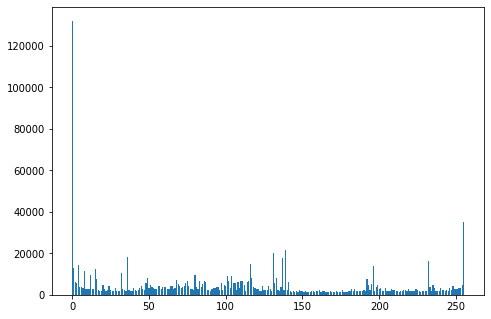

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x = range(256), height = byte_dict.values())
plt.show()

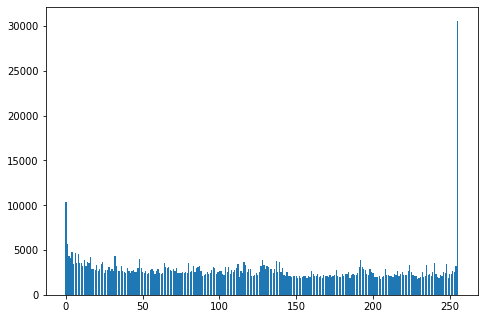

In [ ]:
byte_packed_dict = countByte("/content/putty32_packed.exe")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x = range(256), height = byte_packed_dict.values())
plt.show()

Question: why? Can you do bi-gram or tri-gram? Need to considering sliding window or not? How many grams needed? Can you find a way to do feature selection on these grams so that we do not need to keep so many features?

### ASM

https://www.capstone-engine.org/lang_python.html

In [ ]:
!pip install capstone

     |████████████████████████████████| 2.1MB 6.7MB/s 


In [ ]:
import capstone
import pefile

pef = pefile.PE("/content/putty32.exe")
entryPoint = pef.OPTIONAL_HEADER.AddressOfEntryPoint
data = pef.get_memory_mapped_image()[entryPoint:]
cs = capstone.Cs(capstone.CS_ARCH_X86, capstone.CS_MODE_32)
for i in cs.disasm(data, 0x1000):
    print("0x%x:\t%s\t%s" %(i.address, i.mnemonic, i.op_str))

0x1000:	call	0x128f
0x1005:	jmp	0xe98
0x100a:	push	ebp
0x100b:	mov	ebp, esp
0x100d:	push	dword ptr [ebp + 8]
0x1010:	call	0x101f
0x1015:	neg	eax
0x1017:	pop	ecx
0x1018:	sbb	eax, eax
0x101a:	neg	eax
0x101c:	dec	eax
0x101d:	pop	ebp
0x101e:	ret	
0x101f:	push	ebp
0x1020:	mov	ebp, esp
0x1022:	mov	eax, dword ptr [0x4b507c]
0x1027:	mov	ecx, eax
0x1029:	xor	eax, dword ptr [0x4b9664]
0x102f:	and	ecx, 0x1f
0x1032:	push	dword ptr [ebp + 8]
0x1035:	ror	eax, cl
0x1037:	cmp	eax, -1
0x103a:	jne	0x1043
0x103c:	call	0xc142
0x1041:	jmp	0x104e
0x1043:	push	0x4b9664
0x1048:	call	0xc101
0x104d:	pop	ecx
0x104e:	neg	eax
0x1050:	pop	ecx
0x1051:	sbb	eax, eax
0x1053:	not	eax
0x1055:	and	eax, dword ptr [ebp + 8]
0x1058:	pop	ebp
0x1059:	ret	
0x105a:	push	8
0x105c:	push	0x4b4880
0x1061:	call	0x15ea
0x1066:	and	dword ptr [ebp - 4], 0
0x106a:	mov	eax, 0x5a4d
0x106f:	cmp	word ptr [0x400000], ax
0x1076:	jne	0x10d5
0x1078:	mov	eax, dword ptr [0x40003c]
0x107d:	cmp	dword ptr [eax + 0x400000], 0x4550
0x1087:	jne	0x10d5
0

Note: we do not cover control-flow graph (CFG)!

## Fuzzy Hash

Get an older version.

In [ ]:
!wget https://the.earth.li/~sgtatham/putty/0.72/w32/putty.exe -O putty32_old.exe

--2021-03-31 16:08:11--  https://the.earth.li/~sgtatham/putty/0.72/w32/putty.exe
Resolving the.earth.li (the.earth.li)... 93.93.131.124, 2a00:1098:86:4d:c0ff:ee:15:900d
Connecting to the.earth.li (the.earth.li)|93.93.131.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1098112 (1.0M) [application/x-msdos-program]
Saving to: ‘putty32_old.exe’

putty32_old.exe     100%[===================>]   1.05M  1.27MB/s    in 0.8s    

2021-03-31 16:08:12 (1.27 MB/s) - ‘putty32_old.exe’ saved [1098112/1098112]



In [ ]:
!apt-get install ssdeep

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  ssdeep
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 29.0 kB of archives.
After this operation, 75.8 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 ssdeep amd64 2.14-1 [29.0 kB]
Fetched 29.0 kB in 0s (70.5 kB/s)
Selecting previously unselected package ssdeep.
(Reading database ... 161001 files and directories currently installed.)
Preparing to unpack .../ssdeep_2.14-1_amd64.deb ...
Unpacking ssdeep (2.14-1) ...
Setting up ssdeep (2.14-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!ssdeep /content/putty32.exe

ssdeep,1.1--blocksize:hash:hash,filename
24576:1oJBu2XV04jnHW8VwBYcOa3sM6zlYzLhQ0zJ68VQWWRWqMZ:Su4jHmScOcsvWkq3Z,"/content/putty32.exe"


In [ ]:
!ssdeep /content/putty32_old.exe

ssdeep,1.1--blocksize:hash:hash,filename
24576:wpPg/wTlg6Xklt9e/Y/iIpNh6liEmE2CebHNpVffB:XwRg6X+twii8N0oCeLNbfB,"/content/putty32_old.exe"


In [ ]:
import hashlib
print(hashlib.md5(open("/content/putty32.exe", 'rb').read()).hexdigest())
print(hashlib.md5(open("/content/putty32_old.exe", 'rb').read()).hexdigest())

374fb48a959a96ce92ae0e4346763293
d9e402762e546c0046ad4748778472e1


In [ ]:
# https://www.fireeye.com/blog/threat-research/2014/01/tracking-malware-import-hashing.html

print(pefile.PE("/content/putty32.exe").get_imphash())
print(pefile.PE("/content/putty32_old.exe").get_imphash())

d803cf4cabab38ad6ac8123e3c7a53dd
d803cf4cabab38ad6ac8123e3c7a53dd


Question: take a look at pefile's source code? What is imphash?

In [ ]:
!ssdeep -pb *.exe

putty32.exe matches putty64.exe (43)

putty64.exe matches putty32.exe (43)



Note that python has "ssdeep", but it cannot install in colab directly. https://pypi.org/project/ssdeep/

In [ ]:
!echo "This is a book" > b.txt

In [ ]:
!ssdeep b.txt

ssdeep,1.1--blocksize:hash:hash,filename
3:hMCEwn:huw,"/content/b.txt"
ssdeep: Did not process files large enough to produce meaningful results


In [ ]:
!echo "This is a book." > a.txt

In [ ]:
!ssdeep a.txt

ssdeep,1.1--blocksize:hash:hash,filename
3:hMCE2:hu2,"/content/a.txt"
ssdeep: Did not process files large enough to produce meaningful results
